In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud

In [2]:
aa = pd.read_csv('aa.csv')
aa.head(1)

,country,operator,route,aircraft,all_aboard,passengers_on_board,crew_aboard,number_of_deaths,passenger_fatalities,crew_fatalities,...,year,decade,AM_PM,crew_fatalities_decade,crew_fatality_rate,total_accidents,passenger_fatalities_decade,deaths_of_decade,passenger_fatality_rate,count
0,EEUU,Military - U.S. Army,Demonstration,Others,2,1,1,1,1,0,...,1908,1,PM,84,4.2,20,99,332,4.95,20


HISTOGRAMA:

EL NUMERO DE MUERTES DE TRIPULANTES ES CONSIDERABLEMENTE MENOR A LA DE PASAJEROS, POR SUPUESTO PORQUE EN CADA AVION, REGULARMENTE, VIAJAN MAS PASAJEROS QUE TRIPULANTES. EN UNA TRAGEDIA DE UN AVION GRANDE PUEDEN MORIR 100 PASAJEROS Y 10 TRIPULANTES.

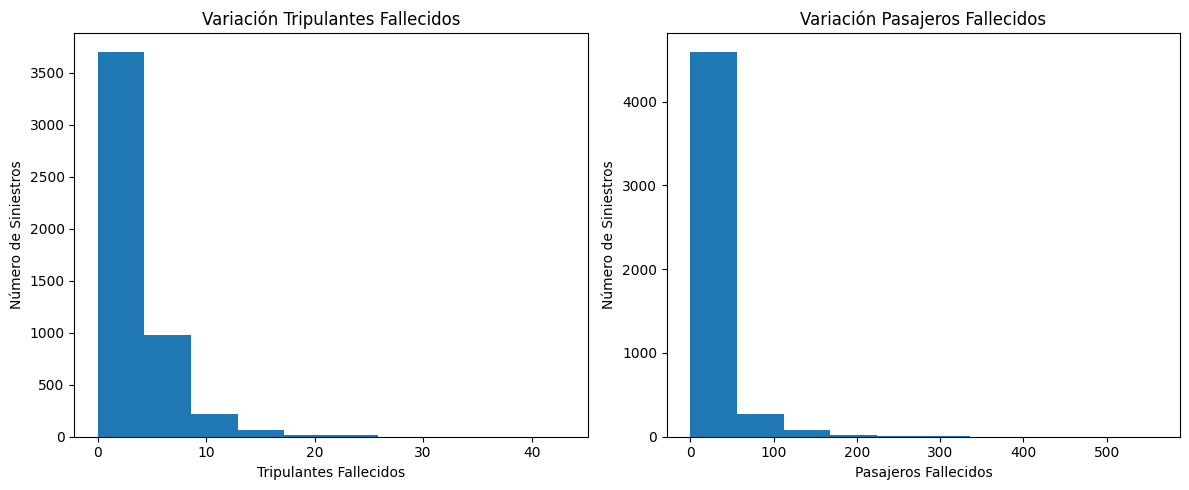

In [42]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].hist(aa['crew_fatalities'], bins=10)
axes[0].set_xlabel('Tripulantes Fallecidos')
axes[0].set_ylabel('Número de Siniestros')
axes[0].set_title('Variación Tripulantes Fallecidos')

axes[1].hist(aa['passenger_fatalities'], bins=10)
axes[1].set_xlabel('Pasajeros Fallecidos')
axes[1].set_ylabel('Número de Siniestros')
axes[1].set_title('Variación Pasajeros Fallecidos')

plt.tight_layout()

plt.show()


DIAGRAMA DE CAJA: 

LA DISTRIBUCION DE LAS TASAS DE PASAJEROS FALLECIDOS ES MAS DISPERSA MIENTRAS QUE LA DE TRIPULANTES SE MANTIENE MAS AGRUPADA, PIENSO EN EL HECHO QUE EN CASI TODOS LOS CASOS LA CANTIDAD DE TRIPULANTES ES LA MISMA EN TODOS LOS VUELOS, PERO EN LA DE PASAJEROS ES MUY CAMBIANTE DEPENDIENDO EL TIPO DE AERONAVE. HAY DOS VALORES EN EL DIAGRAMA DE CAJA DE TASA DE TRIPULANTES QUE ESTA POR FUERA DE LOS BIGOTES Y TIENE QUE VER CON UNA DISMINUCION DE TASA DE FALLECIDOS.

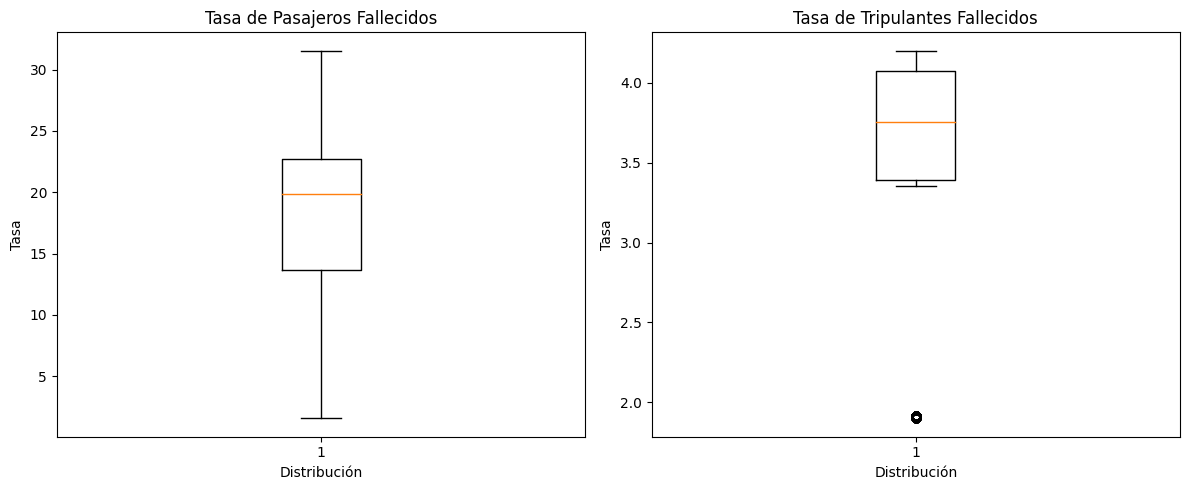

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].boxplot(aa['passenger_fatality_rate'])
axes[0].set_xlabel('Distribución')
axes[0].set_ylabel('Tasa')
axes[0].set_title('Tasa de Pasajeros Fallecidos')

axes[1].boxplot(aa['crew_fatality_rate'])
axes[1].set_xlabel('Distribución')
axes[1].set_ylabel('Tasa')
axes[1].set_title('Tasa de Tripulantes Fallecidos')

plt.tight_layout()

plt.show()

GRAFICO DE DENSIDAD:

PARA EL CONJUNTO DE DATOS OBJETO DE ESTUDIO LA CANTIDAD DE MUERTES REPORTADAS POR ACCIDENTES AEREOS MUESTRA UN NUMERO DE FALLECIDOS INFERIOR A 10 POR CADA ACCIDENTE, SE CONCLUYE QUE RARA VEZ EXISTE UN NUMERO ALTO DE FALLECIDOS POR ACCIDENTE, POR EJEMPLO, MAS DE 100. LA INDUSTRIA AERONAUTICA ES UNA DE LAS MAS CONFIABLES EN TERMINOS DE SEGURIDAD PARA VIAJAR, HAY EXCEPCIONES COMO EL 11 DE SEPTIEMBRE DE 2001 EN EEUU, DE MANERA QUE EN LO HABITUAL NO MUEREN EN UN MISMO HECHO UN NUMERO MUY GRANDE VICTIMAS. 

C:\Users\leidy\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\leidy\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


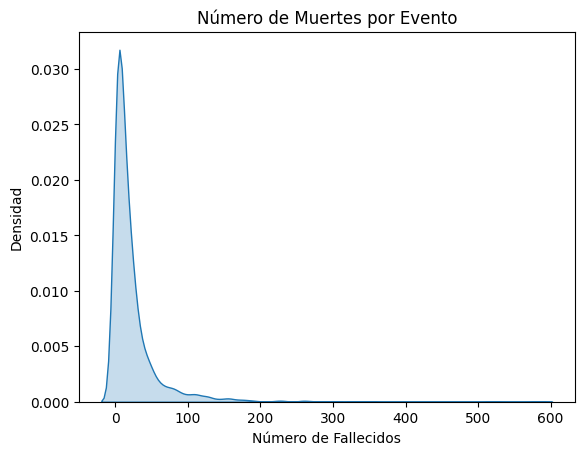

In [115]:
sns.kdeplot(aa['number_of_deaths'], fill=True)
plt.xlabel('Número de Fallecidos')
plt.ylabel('Densidad')
plt.title('Número de Muertes por Evento')
plt.show()

GRAFICO DE PARES: 

LA DIAGONAL PRINCIPAL DE LA MATRIZ DICE QUE LA VARIABLE NUMERO DE TRIPULANTES FALLECIDOS NO ES DIRECTAMENTE PROPORCIONAL A LA VARIABLE NUMERO DE MUERTES, PERO SI LA CANTIDAD DE PASAJEROS FALLECIDOS, ESAS DOS VARIABLES SON DIRECTAMENTE PROPORCIONALES MIENTRAS UNA CRECE (NUMERO DE PASAJEROS FALLECIDOS) EL NUMERO TOTAL DE MUERTES (EVIDENTEMENTE) TAMBIEN CRECE. LA CANTIDAD DE PASAJEROS AL SER MAYOR QUE LA DE TRIPULANTES ES LA QUE MAS IMPACTA EN LA ESTADISTICA PARA CUANDO SE HABLA DEL TOTAL DE FALLECIDOS.

DE ESA MISMA MANERA NO HAY RELACION ENTRE PASAJEROS Y TRIPULANTES MUERTES, SON EVENTOS EXCLUYENTES UNA PERSONA NO PUEDE ESTAR AL MISMO TIEMPO EN AMBOS GRUPOS DE VIAJEROS.

C:\Users\leidy\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\leidy\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\leidy\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\leidy\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future versi

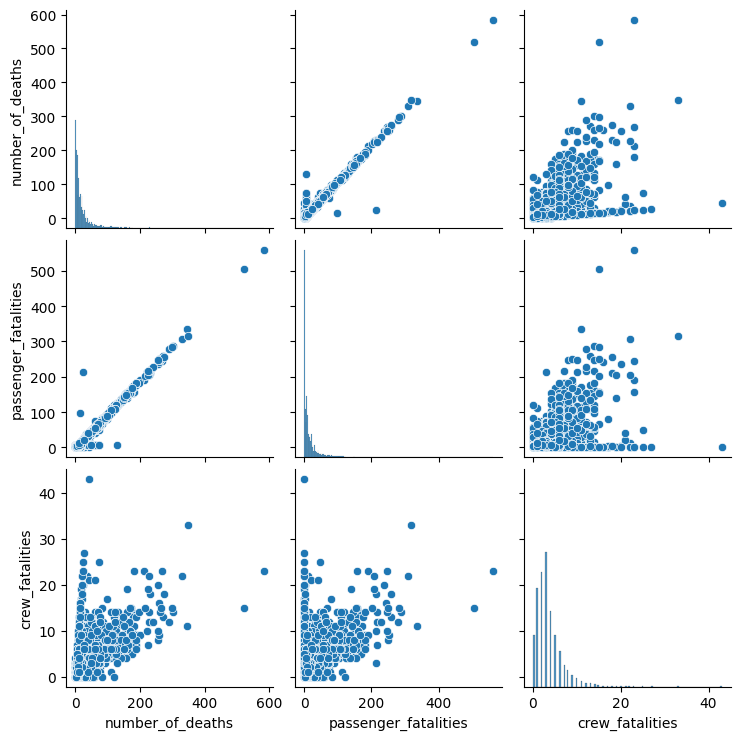

In [39]:
columnas = ['number_of_deaths', 'passenger_fatalities', 'crew_fatalities']
paragraficar = aa[columnas]
sns.pairplot(paragraficar)
plt.show()

DIAGRAMAS DE BARRAS:

LA AEROLINEA RUSA AEROFLOT ES LA QUE MAS VECES SE REPITE EN EL CONJUNTO DE DATOS ANALIZADO, TAMBIEN LAS FUERZAS ARMADAS DE EEUU COMO LOS OPERADORES CON MAS SINIESTROS. EN LO QUE RESPECTA A LA ACTIVIDAD EL ENTRENAMIENTO Y EL TURISMO SON LAS PRINCIPALES ACTIVIDADES REALIZADAS AL MOMENTO DEL SINIESTRO.

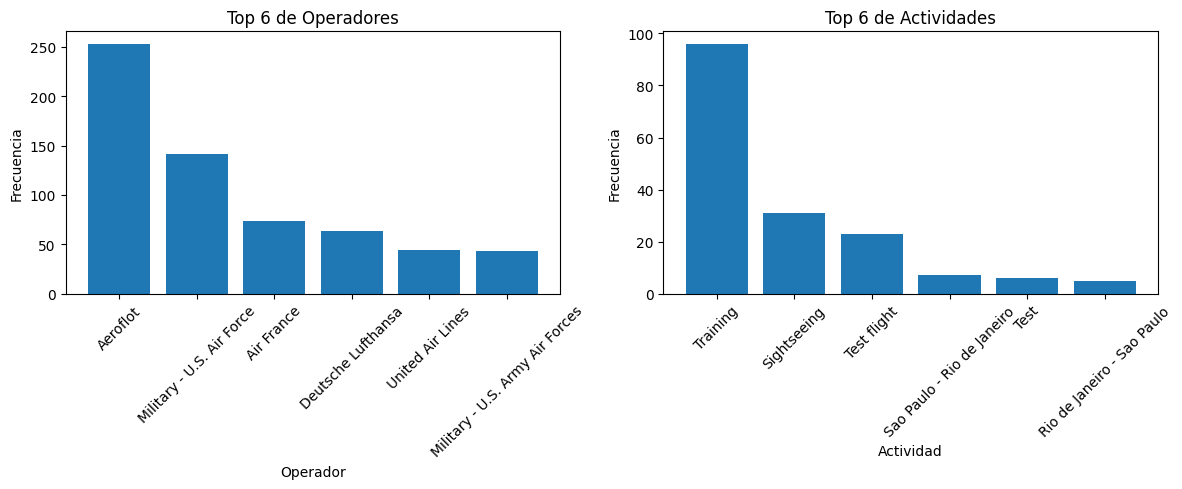

In [116]:
top_6_operadores = aa['operator'].value_counts().head(7)
top_5_actividades = aa['route'].value_counts().head(7)

if 'Others' in top_6_operadores:
    top_6_operadores = top_6_operadores.drop('Others')
     

if 'Sin_Dato' in top_5_actividades:
    top_5_actividades = top_5_actividades.drop('Sin_Dato')

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].bar(top_6_operadores.index, top_6_operadores)
axes[0].set_xlabel('Operador')
axes[0].set_ylabel('Frecuencia')
axes[0].set_title('Top 6 de Operadores')
axes[0].tick_params(axis='x', rotation=45)

axes[1].bar(top_5_actividades.index, top_5_actividades)
axes[1].set_xlabel('Actividad')
axes[1].set_ylabel('Frecuencia')
axes[1].set_title('Top 6 de Actividades')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()

plt.show()

GRAFICO DE PASTEL:

LA AERONAVE DE LA CONSTRUCTORA DOUGLAS ES LA QUE MAS VECES APARECE EN LA CANTIDAD DE ACCIDENTES DEL CONJUTNO DE DATOS, DICHA CONSTRUCTORA ES DE ORIGEN ESTADOUNIDENSE, SE PUEDE INFERIR QUE DURANTE LA PRUEBA DE SUS AERONAVES EN SUELO NORTE AMERICANO SE PRESENTARON MUCHOS DE SUS ACCIDENTES.

DATO: BOEING TAMBIEN ES ESTADOUNIDENSE.

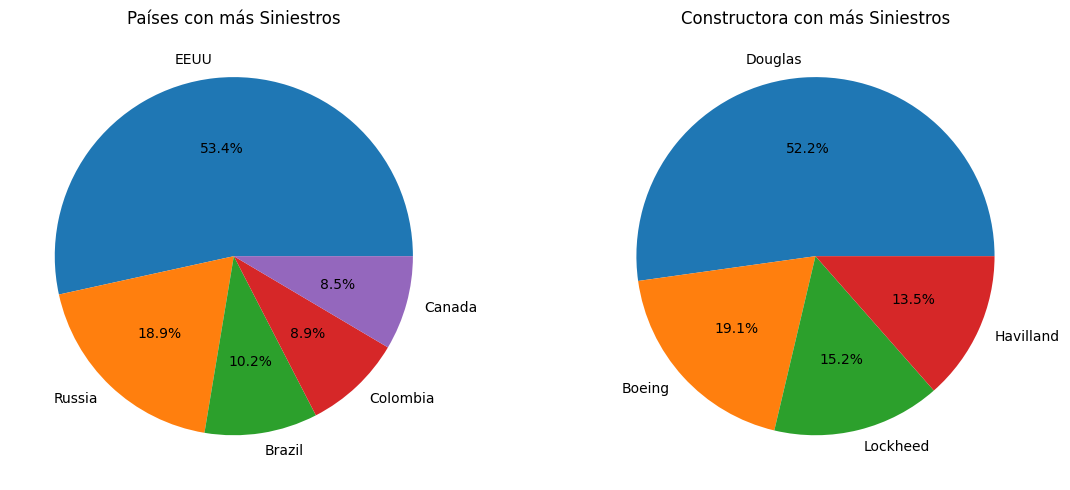

In [90]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

frecuencia_paises = aa['country'].value_counts().head(6)
if 'Others' in frecuencia_paises:
    frecuencia_paises = frecuencia_paises.drop('Others')
frecuencia_paises.plot(kind='pie', autopct='%1.1f%%', ax=axes[0])
axes[0].set_title('Países con más Siniestros')
axes[0].set_ylabel('')

frecuencia_aeronaves = aa['aircraft'].value_counts().head(5)
if 'Others' in frecuencia_aeronaves:
    frecuencia_aeronaves = frecuencia_aeronaves.drop('Others')
frecuencia_aeronaves.plot(kind='pie', autopct='%1.1f%%', ax=axes[1])
axes[1].set_title('Constructora con más Siniestros')
axes[1].set_ylabel('')

plt.tight_layout()

plt.show()

GRAFICO DE LINEAS:

MUESTRA COMO EL PASO DEL TIEMPO HA IMPACTADO EN LA CANTIDAD DE ACCIDENTES AEREOS. AL PRINCIPIO DEL SIGLO XX LA CANTIDAD DE FALLECIDOS NO TENIA LAS CANTIDAD QUE A MITAD DEL SIGLO, ESTO PORQUE LA CANTIDAD DE VUELOS ERA MINIMO, A INICIOS DEL SIGLO XXI LA TENDENCIA ES A LA BAJA, POR LA CANTIDAD DE SEGURIDAD Y CIUDADO DE INGENIERIA QUE SE LE BRINDA A LAS AERONAVES. LAS AYUDAS TECNOLOGICAS DE GEOPOSICION SON DE GRAN AYUDA POR EJEMPLO PARA EL RESCATE DE AVIONES SINIESTRADOS.

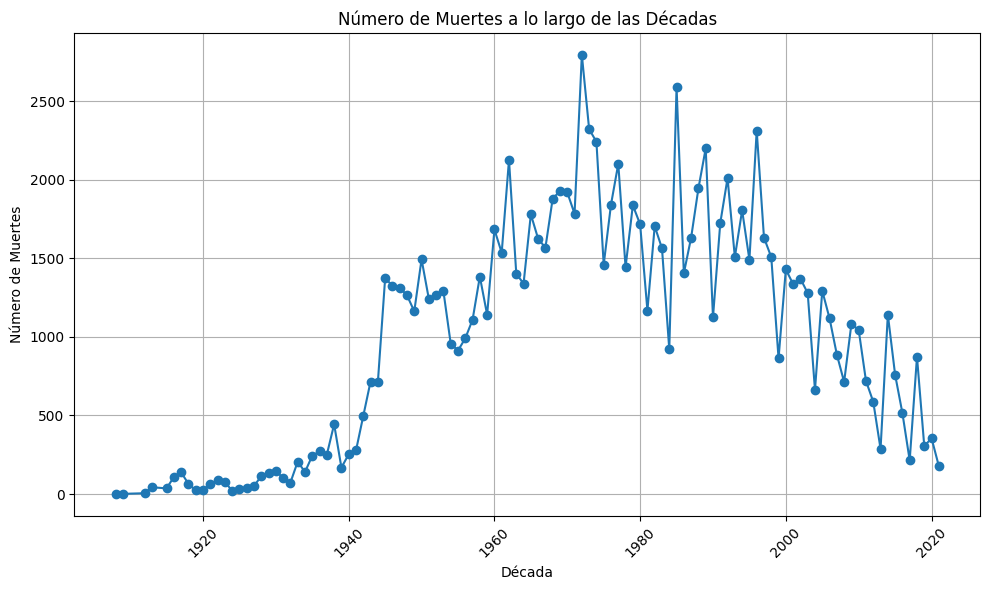

In [113]:
datos_por_decada = aa.groupby('year')['number_of_deaths'].sum().reset_index()
plt.figure(figsize=(10, 6))
plt.plot(datos_por_decada['year'], datos_por_decada['number_of_deaths'], marker='o', linestyle='-')

plt.xlabel('Década')
plt.ylabel('Número de Muertes')
plt.title('Número de Muertes a lo largo de las Décadas')

plt.xticks(rotation=45)

plt.grid(True)
plt.tight_layout()
plt.show()

CON NUBE DE PALABRAS BUSCO IDENTIFICAR LOS NOMBRES DE CIUDADES QUE APORTAN LAS RUTAS DE VUELO MAS REPETIDOS PERO SE HACE UNA LABOR COMPLEJA DADA LA MULTIPLICIDAD DE DATOS

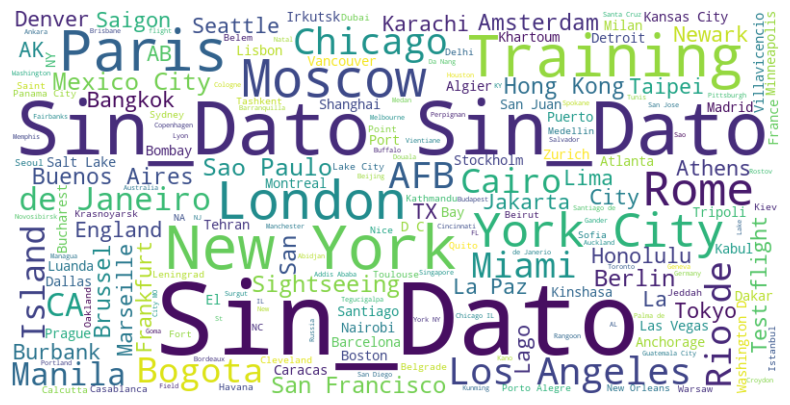

In [72]:
texto_comentarios_a = ' '.join(aa['route'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto_comentarios_a)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [73]:
palabras_a = texto_comentarios_a.split()
contador_a = Counter(palabras_a)
top_30_palabras_a = contador_a.most_common(30)
top_30_palabras_a

[('-', 4603),
 ('Sin_Dato', 755),
 ('City', 185),
 ('New', 147),
 ('San', 140),
 ('Paris', 110),
 ('York', 107),
 ('de', 101),
 ('Training', 101),
 ('London', 82),
 ('Moscow', 81),
 ('Los', 69),
 ('Rio', 69),
 ('Rome', 68),
 ('AFB', 65),
 ('Chicago', 64),
 ('Angeles', 58),
 ('Bogota', 53),
 ('Miami', 52),
 ('Sao', 52),
 ('Mexico', 50),
 ('Cairo', 48),
 ('Janeiro', 45),
 ('Lake', 44),
 ('Paulo', 43),
 ('CA', 41),
 ('Manila', 41),
 ('Port', 40),
 ('Island', 40),
 ('La', 39)]

LEYENDO EL CONJUNTO DE DATOS INICIAL PARA DESCUBRIR LA COLUMNA SUMMARY Y LO QUE PUEDE APORTAR AL ANALISIS

In [56]:
prueba = pd.read_csv('AccidentesAviones.csv')
prueba.head(1)

,Unnamed: 0,fecha,HORA declarada,Ruta,OperadOR,flight_no,route,ac_type,registration,cn_ln,all_aboard,PASAJEROS A BORDO,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,summary
0,0,"September 17, 1908",1718,"Fort Myer, Virginia",Military - U.S. Army,?,Demonstration,Wright Flyer III,?,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."


EN POSIBLES CAUSAS ENCONTRAMOS FALLAS DE INGENIERIA, TIPO DE AERONAVE, PILOTO, TRIPULANTES Y VUELO, LA PALABRA MAS REPETIDA ES 'SE ESTRELLO' CON UN TOTAL DE 3074 APARICIONES

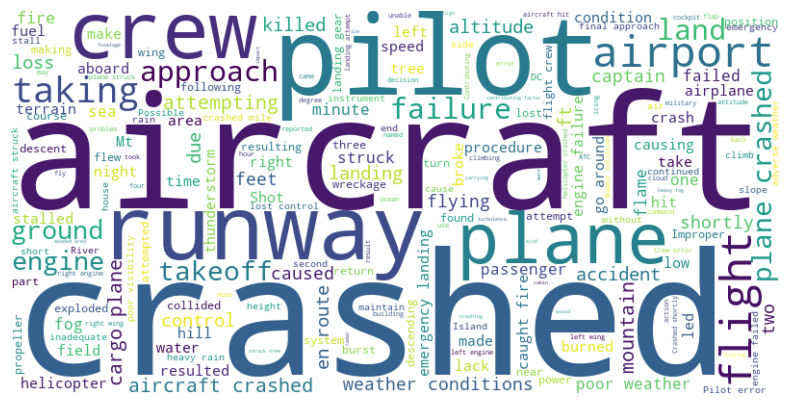

In [71]:
texto_comentarios = ' '.join(prueba['summary'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto_comentarios)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [70]:
palabras = texto_comentarios.split()
contador = Counter(palabras)
top_30_palabras = contador.most_common(30)
top_30_palabras

[('the', 13653),
 ('of', 5543),
 ('and', 5437),
 ('to', 5422),
 ('a', 5087),
 ('The', 4794),
 ('in', 3595),
 ('was', 2771),
 ('into', 2360),
 ('aircraft', 2294),
 ('plane', 2086),
 ('crashed', 2024),
 ('after', 1642),
 ('on', 1613),
 ('an', 1480),
 ('from', 1410),
 ('at', 1375),
 ('while', 1238),
 ('Crashed', 1073),
 ('by', 1026),
 ('flight', 887),
 ('with', 883),
 ('off', 845),
 ('crew', 842),
 ('engine', 800),
 ('pilot', 777),
 ('during', 694),
 ('were', 690),
 ('approach', 667),
 ('for', 657)]

FIN DEL ANALISIS DE LAS GRAFICAS. LAS CONCLUSIONES EN EL README.